# Relatório de Análise I

## Importando a Base de Dados

In [243]:
import pandas as pd
import matplotlib.pyplot as plt

In [154]:
dados = pd.read_csv('Dados/aluguel.csv', sep=';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [155]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


## Informações Gerais sobre a Base de Dados

In [156]:
#verificando os tipos de dados

dados.dtypes

Tipo           object
Bairro         object
Quartos         int64
Vagas           int64
Suites          int64
Area            int64
Valor         float64
Condominio    float64
IPTU          float64
dtype: object

In [157]:
#salvando os tipos de dados em um df

tipos_de_dados = pd.DataFrame(dados.dtypes, 
    columns = ['tipos_de_dados'])
tipos_de_dados.columns.name = 'variáveis'
tipos_de_dados

variáveis,tipos_de_dados
Tipo,object
Bairro,object
Quartos,int64
Vagas,int64
Suites,int64
Area,int64
Valor,float64
Condominio,float64
IPTU,float64


In [158]:
#shape do df

dados.shape

(32960, 9)

In [159]:
#Avaliar os tipos de imóveis e qntos tem de cada um

dados['Tipo'].value_counts()

Apartamento                    19532
Conjunto Comercial/Sala         6815
Loja/Salão                      1426
Casa de Condomínio               996
Casa                             967
Quitinete                        836
Galpão/Depósito/Armazém          623
Flat                             476
Prédio Inteiro                   301
Casa Comercial                   265
Casa de Vila                     249
Loja Shopping/ Ct Comercial      247
Box/Garagem                       82
Terreno Padrão                    70
Loft                              51
Sítio                             10
Loteamento/Condomínio              5
Studio                             4
Hotel                              2
Chácara                            1
Pousada/Chalé                      1
Indústria                          1
Name: Tipo, dtype: int64

## Organizando a Visualização

In [160]:
#Criando um df com os tipos de imoveis e qntas vezes cada um apareceu

aparicoes_imovel = dados['Tipo'].value_counts().reset_index()
aparicoes_imovel.columns = ['tipo_imovel', 'aparicoes']
aparicoes_imovel.columns.name = 'indice'
aparicoes_imovel

indice,tipo_imovel,aparicoes
0,Apartamento,19532
1,Conjunto Comercial/Sala,6815
2,Loja/Salão,1426
3,Casa de Condomínio,996
4,Casa,967
5,Quitinete,836
6,Galpão/Depósito/Armazém,623
7,Flat,476
8,Prédio Inteiro,301
9,Casa Comercial,265


## Imóveis Residenciais

In [161]:
print(dados.shape)
dados.head()

(32960, 9)


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [162]:
imoveis_residenciais = [
    'Apartamento',
    'Casa de Condomínio',
    'Casa',
    'Quitinete',
    'Casa de Vila', 
]

residencial_df = dados[dados.Tipo.isin(imoveis_residenciais)].reset_index(drop=True)
print(residencial_df.shape)
residencial_df

(22580, 9)


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
22575,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
22576,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
22577,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
22578,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


## Exportando a base de Dados

In [163]:
residencial_df.to_csv('Dados/aluguel_residencial.csv', index = False)

In [164]:
residencial_df_2 = pd.read_csv('Dados/aluguel_residencial.csv')
residencial_df_2.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


## Seleções e Frequências

In [165]:
#selcionando os imóveis classificados com tipo Apartamento

dados_apartamento = dados[dados.Tipo == 'Apartamento']

print(f'A frequência de imóveis do tipo apartamento é de {dados_apartamento.shape[0] / dados.shape[0] * 100:.2f}%')
dados_apartamento.head()


A frequência de imóveis do tipo apartamento é de 59.26%


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN


In [166]:
#Selecionando imóveis classificados como Casa, Casa de Condomínio ou 
selecao = ['Casa', 'Casa de Condomínio', 'Casa de Vila']
dados_casas = dados[dados.Tipo.isin(selecao)]

print(f'A frequência de imóveis do tipo casa é de {dados_casas.shape[0] / dados.shape[0] * 100:.2f}%')
dados_casas.head()

A frequência de imóveis do tipo casa é de 6.71%


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
18,Casa de Condomínio,Taquara,3,1,1,115,2000.0,NaN,NaN
22,Casa de Condomínio,Barra da Tijuca,4,3,2,466,7500.0,2695.0,NaN


In [167]:
#Selecionando imóveis entre 60 e 100 metros quadrados
dados_60_100 = dados[(dados.Area >= 60) & (dados.Area <= 100)]

print(f'A frequência de imóveis do com área entre 60 e 100 m² '
      f'é de {dados_60_100.shape[0] / dados.shape[0] * 100:.2f}%')
dados_60_100

A frequência de imóveis do com área entre 60 e 100 m² é de 30.91%


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...,...
32944,Apartamento,Recreio dos Bandeirantes,3,2,1,88,1550.0,790.0,NaN
32947,Apartamento,Leblon,3,0,1,80,3000.0,1010.0,249.0
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0


In [168]:
#Selecionando imóveis com pelo menos 4 quartos e aluguel menor q 2000
dados_4q_2k = dados[(dados.Quartos >= 4) & (dados.Valor <= 2000)]
print(f'A frequência de imóveis do com pelo menos 4 quartos e custo menor '
      f'que 2000 é de {dados_4q_2k.shape[0] / dados.shape[0] * 100:.2f}%')
dados_4q_2k

A frequência de imóveis do com pelo menos 4 quartos e custo menor que 2000 é de 0.19%


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
701,Apartamento,Recreio dos Bandeirantes,4,2,2,160,1900.0,830.0,NaN
1465,Apartamento,Taquara,4,1,1,110,1900.0,NaN,NaN
2367,Apartamento,Tijuca,4,1,0,160,2000.0,1032.0,1056.0
2874,Casa,Campo Grande,4,1,4,100,1600.0,NaN,NaN
3000,Apartamento,Tijuca,4,1,2,190,2000.0,1247.0,353.0
...,...,...,...,...,...,...,...,...,...
30599,Apartamento,Campo Grande,4,2,1,140,2000.0,600.0,NaN
30670,Apartamento,Barra da Tijuca,4,3,4,148,1500.0,1600.0,196.0
31382,Apartamento,Vargem Grande,4,0,1,180,1900.0,NaN,176.0
31840,Apartamento,Recreio dos Bandeirantes,4,2,2,160,1900.0,1038.0,NaN


## Lidando com NaNs

### dropando os NaNs

In [169]:
linhas_original = dados.shape[0]
print(dados.shape)
dados.head()

(32960, 9)


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [170]:
print(dados[dados.Valor.isnull()].shape[0])
dados[dados.Valor.isnull()]

17


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
76,Apartamento,Barra da Tijuca,2,1,1,70,NaN,970.0,68.0
2186,Apartamento,Leme,2,0,0,75,NaN,878.0,NaN
2456,Casa,Campo Grande,3,4,3,363,NaN,NaN,NaN
2646,Loja/Salão,Barra da Tijuca,0,2,0,80,NaN,NaN,NaN
2941,Apartamento,Botafogo,2,0,0,95,NaN,1010.0,170.0
2973,Apartamento,Copacabana,2,0,0,72,NaN,850.0,NaN
6598,Loja/Salão,Andaraí,0,0,0,326,NaN,NaN,1140.0
7302,Casa,Campo Grande,3,2,1,100,NaN,NaN,NaN
12683,Apartamento,Leme,2,0,1,75,NaN,878.0,NaN
13229,Apartamento,Glória,3,0,1,135,NaN,910.0,228.0


In [171]:
dados.dropna(subset='Valor', inplace=True)

print(f'Foram retiradas {linhas_original - dados.shape[0]} linhas')
dados.head()

Foram retiradas 17 linhas


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [172]:
dados[dados.Valor.isnull()]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU


### dropando os NaNs com uma condição

In [173]:
#aqui eu quero tirar tds os apartamentos sem condomínio
linhas_original = dados.shape[0]
selecao = (dados.Tipo == 'Apartamento') & (dados.Condominio.isnull())

dados = dados[~selecao]

print(f'Foram retiradas {linhas_original - dados.shape[0]} linhas')
print(f'Ainda restam {dados[dados.Condominio.isnull()].shape[0]} NaNs na coluna Condomínio')

Foram retiradas 745 linhas
Ainda restam 3344 NaNs na coluna Condomínio


In [174]:
dados[dados.Condominio.isnull()]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
16,Prédio Inteiro,Botafogo,0,0,0,536,28000.0,NaN,3563.0
18,Casa de Condomínio,Taquara,3,1,1,115,2000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32914,Loja/Salão,Campo Grande,0,0,0,160,2650.0,NaN,NaN
32928,Loja/Salão,Leblon,0,0,0,68,25000.0,NaN,1113.0
32929,Loja/Salão,Freguesia (Jacarepaguá),0,0,0,80,5800.0,NaN,215.0
32931,Casa,Centro,5,0,1,160,5000.0,NaN,80.0


### preenchendo NaNs

In [184]:
dados.fillna({'Condominio': 0, 'IPTU': 0}, inplace = True)

dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,0.0


In [185]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32198 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32198 non-null  object 
 1   Bairro      32198 non-null  object 
 2   Quartos     32198 non-null  int64  
 3   Vagas       32198 non-null  int64  
 4   Suites      32198 non-null  int64  
 5   Area        32198 non-null  int64  
 6   Valor       32198 non-null  float64
 7   Condominio  32198 non-null  float64
 8   IPTU        32198 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.5+ MB


In [186]:
#Salvando arquivo

dados.to_csv('Dados/dados_limpos', index=False)

## Criando Novas Variáveis

In [203]:
dados['Valor_Bruto'] = dados['Valor'] + dados['Condominio'] + dados['IPTU']
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_Bruto
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,10331.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0


In [207]:
dados['valor_m2'] = (dados['Valor'] / dados['Area']).round(2)
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_Bruto,valor_m2
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,10331.0,34.67
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67


In [208]:
casas = ['Casa', 'Casa de Vila', 'Casa de Condominio']

dados['tipo_agregado'] = dados['Tipo'].apply(lambda x: 'Casa' if x in casas else 'Apartamento')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_Bruto,valor_m2,tipo_agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,Casa
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,10331.0,34.67,Apartamento
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,Apartamento
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,Apartamento


## Avaliando Grupos

In [231]:
custo_medio = dados.groupby('Bairro')[['Valor']].mean()
custo_medio

,Valor
Bairro,
Abolição,2043.809524
Alto da Boa Vista,7685.714286
Anchieta,3861.111111
Andaraí,1943.710280
Anil,5022.325581
...,...
Vila Valqueire,2202.456140
Vila da Penha,1729.354839
Vista Alegre,1166.470588


# Estatísticas Descritivas

In [232]:
dados.describe()

,Quartos,Vagas,Suites,Valor,Condominio,IPTU,Valor_Bruto,valor_m2
count,32198.000000,32198.000000,32198.00000,3.219800e+04,3.219800e+04,3.219800e+04,3.219800e+04,32198.00
mean,1.765389,1.777968,0.67116,1.317797e+04,2.140682e+03,1.667719e+03,1.698637e+04,inf
std,1.723393,20.618914,1.18288,6.751986e+05,3.710979e+04,1.508503e+05,6.934736e+05,NaN
min,0.000000,0.000000,0.00000,7.500000e+01,0.000000e+00,0.000000e+00,7.500000e+01,0.02
25%,0.000000,0.000000,0.00000,1.500000e+03,4.740000e+02,0.000000e+00,2.180000e+03,22.00
50%,2.000000,1.000000,0.00000,2.800000e+03,8.700000e+02,1.290000e+02,4.110000e+03,32.22
75%,3.000000,2.000000,1.00000,6.637500e+03,1.682000e+03,4.410000e+02,9.340750e+03,46.67
max,100.000000,1966.000000,70.00000,1.200000e+08,6.552570e+06,2.705307e+07,1.200100e+08,inf


In [233]:
dados['Valor'].aggregate(['min', 'max', 'sum'])

min           75.0
max    120000000.0
sum    424304322.0
Name: Valor, dtype: float64

In [236]:
dados.groupby('Bairro')['Valor'].aggregate(['min', 'max', 'sum'])

,min,max,sum
Bairro,,,
Abolição,800.0,8000.0,42920.0
Alto da Boa Vista,600.0,30000.0,53800.0
Anchieta,700.0,20000.0,34750.0
Andaraí,600.0,20000.0,207977.0
Anil,300.0,70000.0,431920.0
...,...,...,...
Vila Valqueire,800.0,16000.0,125540.0
Vila da Penha,400.0,24000.0,268050.0
Vista Alegre,700.0,2000.0,19830.0


In [240]:
num_quartos = [0, 2, 4, 6, 100]

quartos = pd.cut(dados['Quartos'], num_quartos)

pd.value_counts(quartos)

(0, 2]      11855
(2, 4]       9715
(4, 6]        706
(6, 100]       85
Name: Quartos, dtype: int64

## Remoção de Outliers

In [244]:
plt.rc('figure', figsize = (20, 10))

<AxesSubplot:>

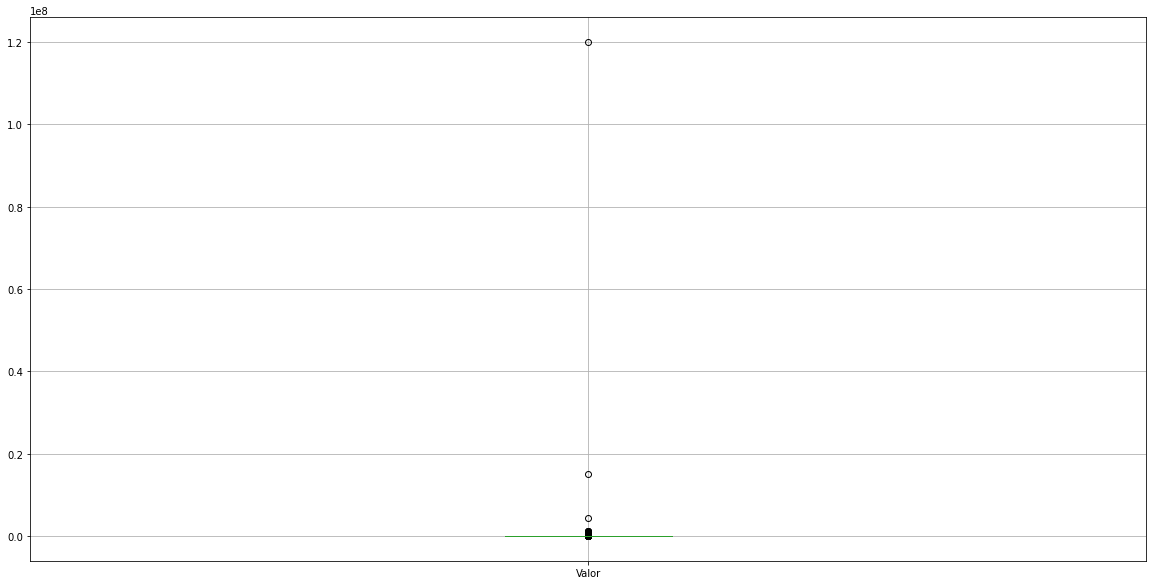

In [245]:
dados.boxplot(['Valor'])

In [260]:
valor = dados['Valor']
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)

In [261]:
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [262]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

<AxesSubplot:>

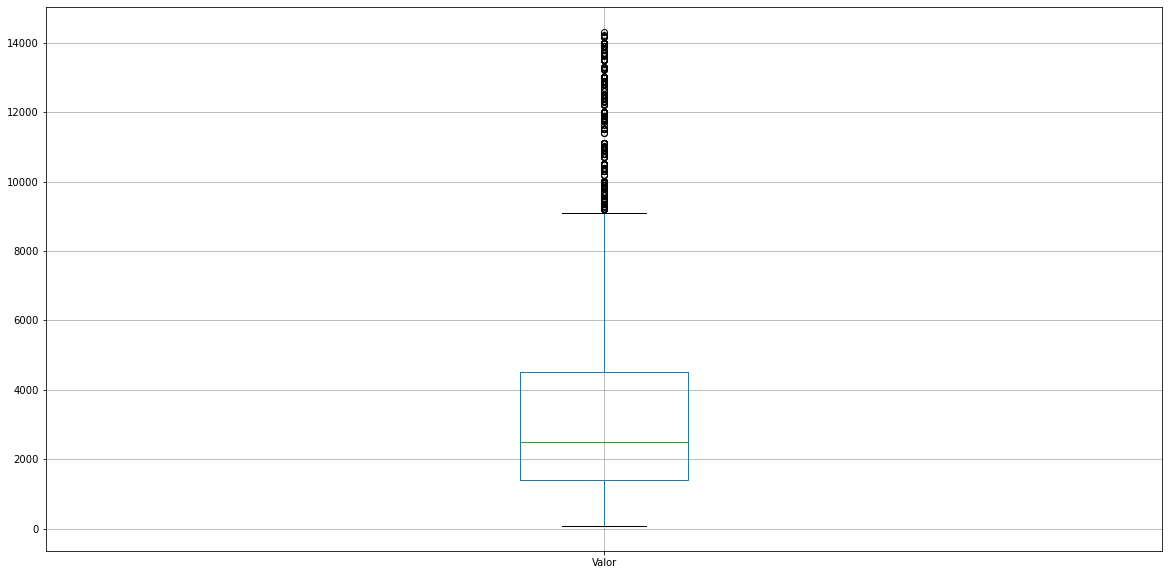

In [263]:
dados_new.boxplot(['Valor'])

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

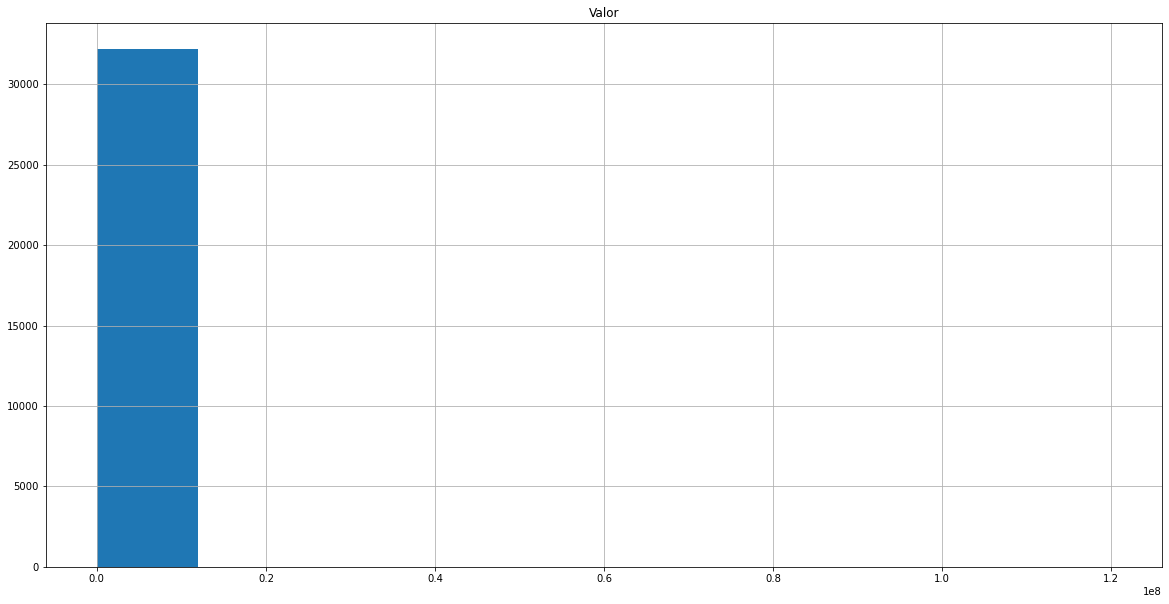

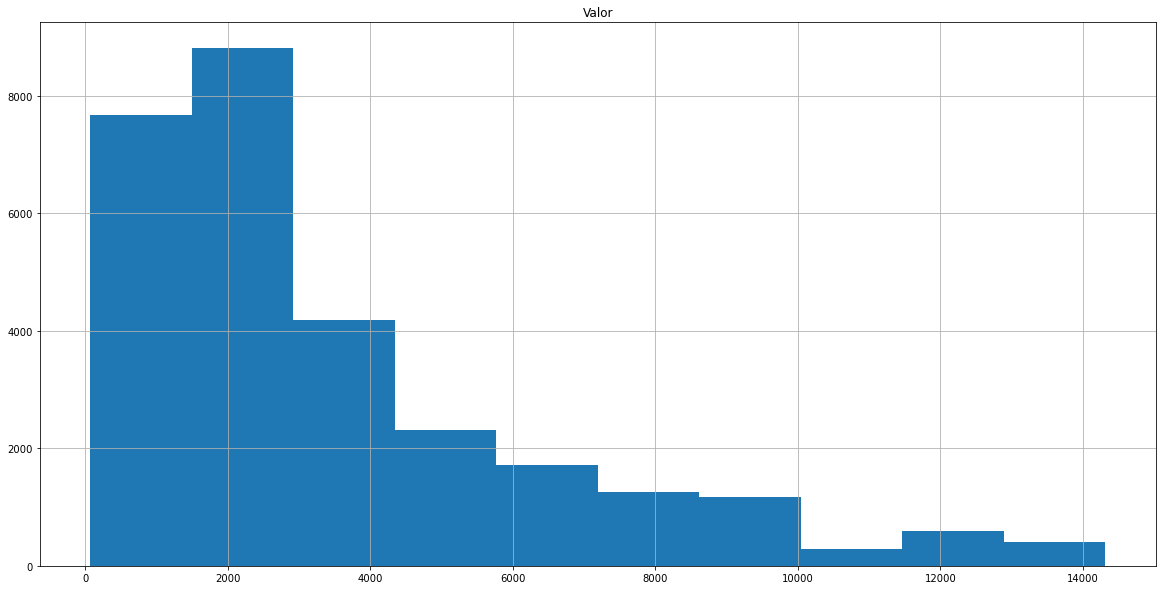

In [265]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])